In [43]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

<b> Загрузка и предобработка исходных данных

In [44]:
data = pd.read_csv("../../Практические материалы/Lab 1. Linear and logistic regression/mnist/mnist_train.csv")
data_test = pd.read_csv("../../Практические материалы/Lab 1. Linear and logistic regression/mnist/mnist_test.csv")

In [45]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X = data.iloc[:,1:].values

In [47]:
X.shape

(60000, 784)

In [49]:
n = 784

In [50]:
cov = np.zeros([n,n])

for i in tqdm(range(n)):
    for j in range(i,n):
        cov[i,j] = np.mean((X[:,i] - np.mean(X[:,i]))*(X[:,j] - np.mean(X[:,j])))
        cov[j,i] = cov[i,j]

100%|██████████| 784/784 [01:31<00:00,  8.59it/s]


In [51]:
cov[220,230]

-90.8021121722222

In [56]:
np.mean(X,axis=0).shape

(784,)

In [64]:
cov2 = np.matmul((X-np.mean(X,axis=0)).T,X-np.mean(X,axis=0))/len(X)

In [61]:
cov2[220,230]

-90.80211217222214

In [65]:
cov3 = np.cov(X.T)

In [66]:
cov3[220,230]

-90.80362556598158

In [67]:
U,S,V = np.linalg.svd(cov)

In [147]:
np.sum(S[0:331])/np.sum(S)

0.9900129426354094

In [185]:
U_reduce = U[:,0:2]

In [186]:
X_reduce = np.matmul(X,U_reduce)

In [187]:
X_reduce.shape

(60000, 2)

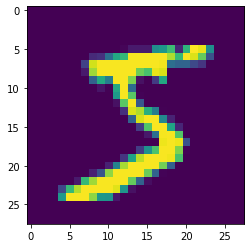

In [188]:
plt.imshow(X[0,:].reshape([28,28]))

In [189]:
X_res = np.matmul(X_reduce,U_reduce.T)

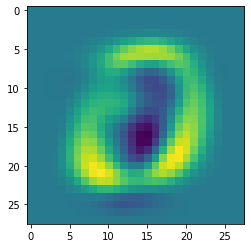

In [190]:
plt.imshow(X_res[0,:].reshape([28,28]))

In [180]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA(n_components=10)

In [182]:
X_reduce2 = pca.fit_transform(X)

In [183]:
X_res2 = pca.inverse_transform(X_reduce2)

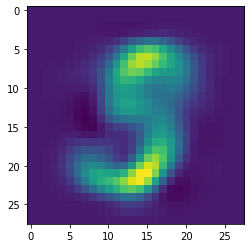

In [184]:
plt.imshow(X_res2[0,:].reshape([28,28]))

In [194]:
X_rrr = pd.DataFrame(X_reduce)

In [196]:
X_rrr['label'] = data.label

In [197]:
X_rrr

,0,1,label
0,880.731433,329.950766,5
1,1768.517220,312.133542,0
2,704.949236,-374.896649,4
3,-42.328192,624.473721,1
4,374.043902,-713.266364,9
...,...,...,...
59995,657.177084,310.752065,8
59996,909.556654,705.176204,3
59997,578.745395,-142.801708,5
59998,887.404916,22.868440,6


In [200]:
data_0 = X_rrr[X_rrr.label == 0]
data_1 = X_rrr[X_rrr.label == 1]
data_2 = X_rrr[X_rrr.label == 2]

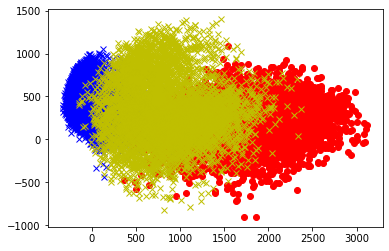

In [201]:
plt.plot(data_0[0],data_0[1],'ro')
plt.plot(data_1[0],data_1[1],'bx')
plt.plot(data_2[0],data_2[1],'yx')